In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil data dari file JSON
data_url = "https://gist.githubusercontent.com/nadirbslmh/8fc9cc6cd5cbaaf5cbff63b090fb497e/raw/a7bf3e1edab88b04314a40a9de3ed744bc86d0e9/ecommerce.json"
data = pd.read_json(data_url)
df = pd.DataFrame(data)
df

,transaction_id,transaction_date,customer_name,transaction_amount,item_category,item_name,payment_method,status
0,1,01-11-2023,John Doe,50.0,book,The Great Gatsby,credit card,success
1,2,01-11-2023,Jane Smith,120.5,gaming,PlayStation 5,cash,success
2,3,02-11-2023,Bob Johnson,800.0,technology,Laptop,credit card,failed
3,4,03-11-2023,Alice Williams,30.0,kitchen,Coffee Maker,e wallet,success
4,5,03-11-2023,Charlie Brown,150.0,book,To Kill a Mockingbird,credit card,success
...,...,...,...,...,...,...,...,...
95,96,21-12-2023,Oliver Brown,15.0,kitchen,Peeler,credit card,success
96,97,21-12-2023,Chloe Wilson,75.5,book,The Road,credit card,success
97,98,22-12-2023,Ella Harris,30.0,gaming,Board Game: Monopoly,cash,success
98,99,22-12-2023,Liam Turner,180.0,technology,Bluetooth Earbuds,e wallet,success


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      100 non-null    int64  
 1   transaction_date    100 non-null    object 
 2   customer_name       100 non-null    object 
 3   transaction_amount  100 non-null    float64
 4   item_category       100 non-null    object 
 5   item_name           100 non-null    object 
 6   payment_method      100 non-null    object 
 7   status              100 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.4+ KB


# No. 1

## a : Line Plot Jumlah Transaksi per hari

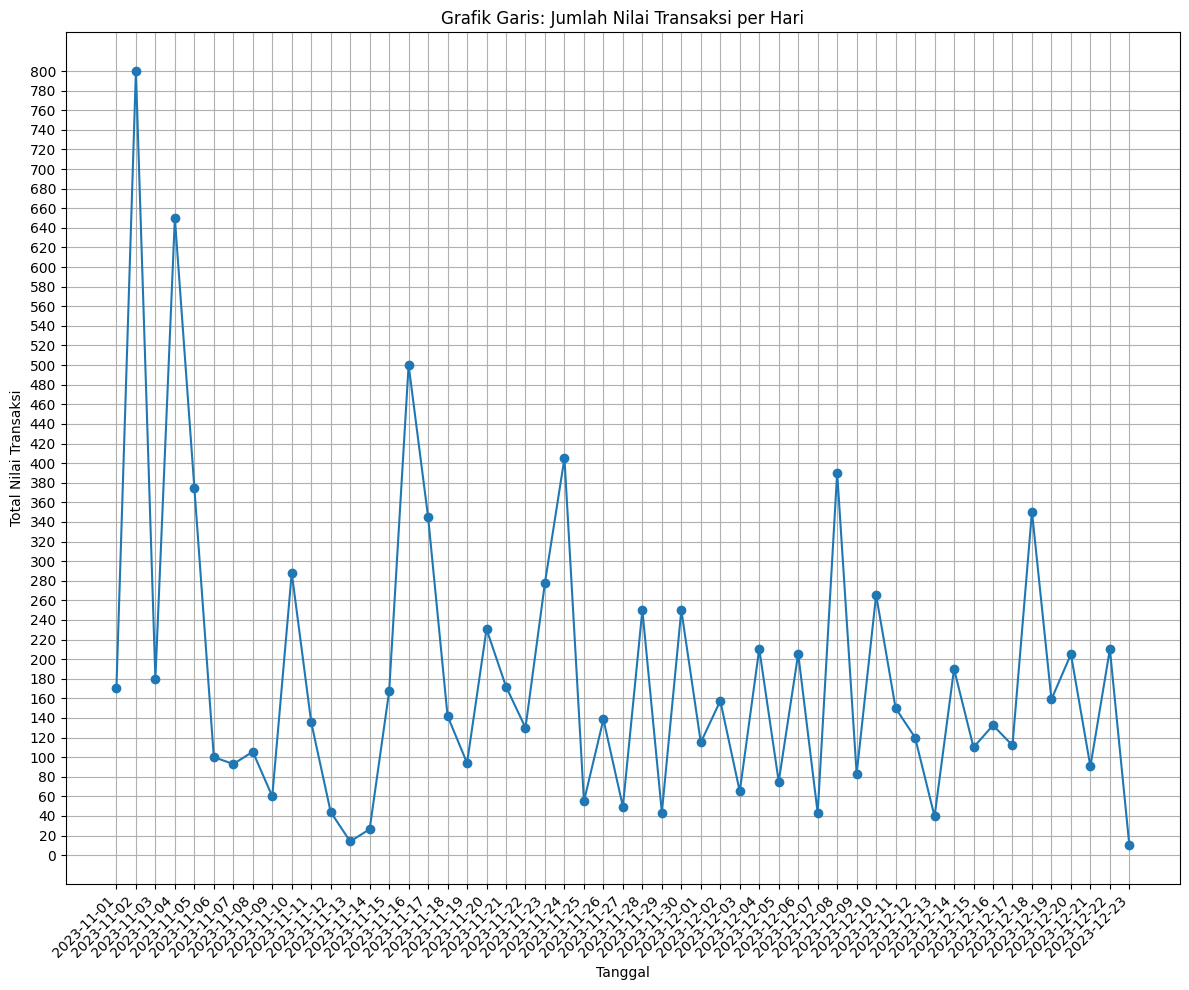

In [69]:
# Pra-pemrosesan data
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d-%m-%Y')

plt.figure(figsize=(12, 10))
total_harian = df.groupby(df['transaction_date'].dt.floor('D'))['transaction_amount'].sum()
plt.plot(total_harian, marker='o')
plt.title('Grafik Garis: Jumlah Nilai Transaksi per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Total Nilai Transaksi')

# Atur penanda sumbu-x dan label harian
plt.xticks(total_harian.index, rotation=45, ha='right')

# Atur jarak pada label sumbu y menjadi 20
plt.yticks(range(0, int(total_harian.max())+20, 20))

plt.grid(True)
plt.tight_layout()
plt.show()

## b : Bar Plot Jumlah Customer Perhari

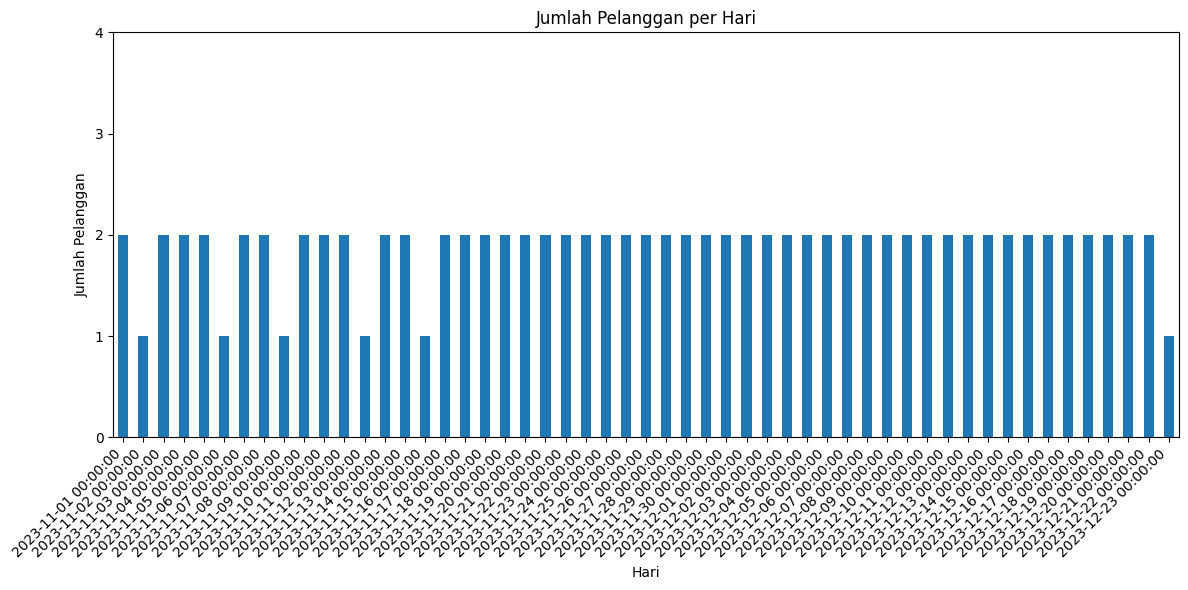

In [84]:
# Mengelompokkan data berdasarkan hari dan menghitung jumlah pelanggan untuk setiap hari
customer_per_day = df.groupby(df['transaction_date']).size()

# Membuat bar plot
customer_per_day.plot(kind='bar', figsize=(12, 6))
plt.title('Jumlah Pelanggan per Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45, ha='right')

plt.yticks(range(0, 5))
plt.tight_layout()
plt.show()

## c : Scatter Plot Jumlah Nilai dari Transaksi

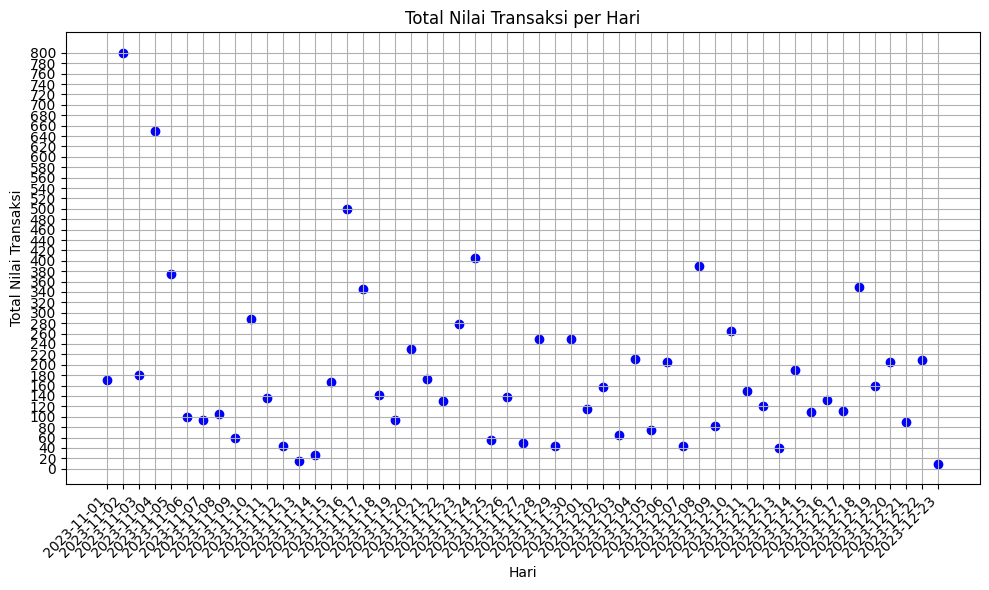

In [87]:
total_harian = df.groupby(df['transaction_date'].dt.floor('D'))['transaction_amount'].sum()
plt.figure(figsize=(10, 6))
plt.scatter(total_harian.index, total_harian.values, color='blue')
plt.title('Total Nilai Transaksi per Hari')
plt.xlabel('Hari')
plt.ylabel('Total Nilai Transaksi')

# Atur penanda sumbu-x dan label harian
plt.xticks(total_harian.index, rotation=45, ha='right')

# Atur jarak pada label sumbu y menjadi 20
plt.yticks(range(0, int(total_harian.max())+20, 20))
plt.grid(True)
plt.tight_layout()
plt.show()

# No. 2

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data transaksi dari file CSV
data_roti = pd.read_csv("bakery.csv")
df_roti = pd.DataFrame(data_roti)
df_roti

,transaction_id,transaction_date,customer_name,transaction_amount,item_name,payment_method,customer_rating,bread_rating
0,1,01-11-2023,John Doe,25.0,Croissant,credit card,8,9
1,2,01-11-2023,Jane Smith,10.5,Baguette,cash,7,8
2,3,02-11-2023,Bob Johnson,15.0,Cinnamon Roll,credit card,9,7
3,4,03-11-2023,Alice Williams,8.0,Cinnamon Roll,cash,6,9
4,5,03-11-2023,Charlie Brown,12.0,Croissant,credit card,8,8
5,6,04-11-2023,David Wilson,30.0,Cinnamon Roll,cash,7,9
6,7,04-11-2023,Emma Davis,20.0,Whole Wheat Bread,credit card,9,8
7,8,05-11-2023,George Thompson,5.5,Cinnamon Roll,cash,6,7
8,9,05-11-2023,Olivia Martin,18.0,Croissant,credit card,8,9
9,10,06-11-2023,Samuel Moore,7.0,Shortbread Cookie,cash,7,8


In [91]:
df_roti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      25 non-null     int64  
 1   transaction_date    25 non-null     object 
 2   customer_name       25 non-null     object 
 3   transaction_amount  25 non-null     float64
 4   item_name           25 non-null     object 
 5   payment_method      25 non-null     object 
 6   customer_rating     25 non-null     int64  
 7   bread_rating        25 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 1.7+ KB


## a : Jumlah nilai transaksi per hari.

In [144]:
# Mengubah kolom 'transaction_date' menjadi tipe data datetime
df_roti['transaction_date'] = pd.to_datetime(df_roti['transaction_date'], format='%d-%m-%Y')

# Menghitung jumlah nilai transaksi per hari
penjualan_harian = df_roti.groupby(df_roti['transaction_date'].dt.date)['transaction_amount'].sum().reset_index()

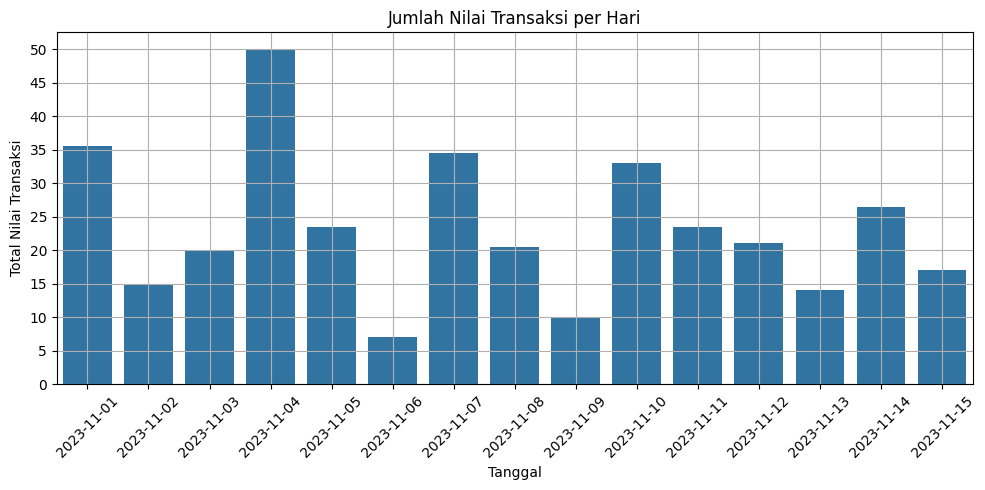

In [145]:
# Visualisasi jumlah nilai transaksi per hari
plt.figure(figsize=(10, 5))
sns.barplot(x='transaction_date', y='transaction_amount', data=penjualan_harian)
plt.title('Jumlah Nilai Transaksi per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Total Nilai Transaksi')
plt.xticks(rotation=45)
plt.yticks(range(0, int(max(penjualan_harian['transaction_amount']))+1, 5))
plt.tight_layout()
plt.grid(True)
plt.show()

## b : Jenis roti yang paling banyak dipesan

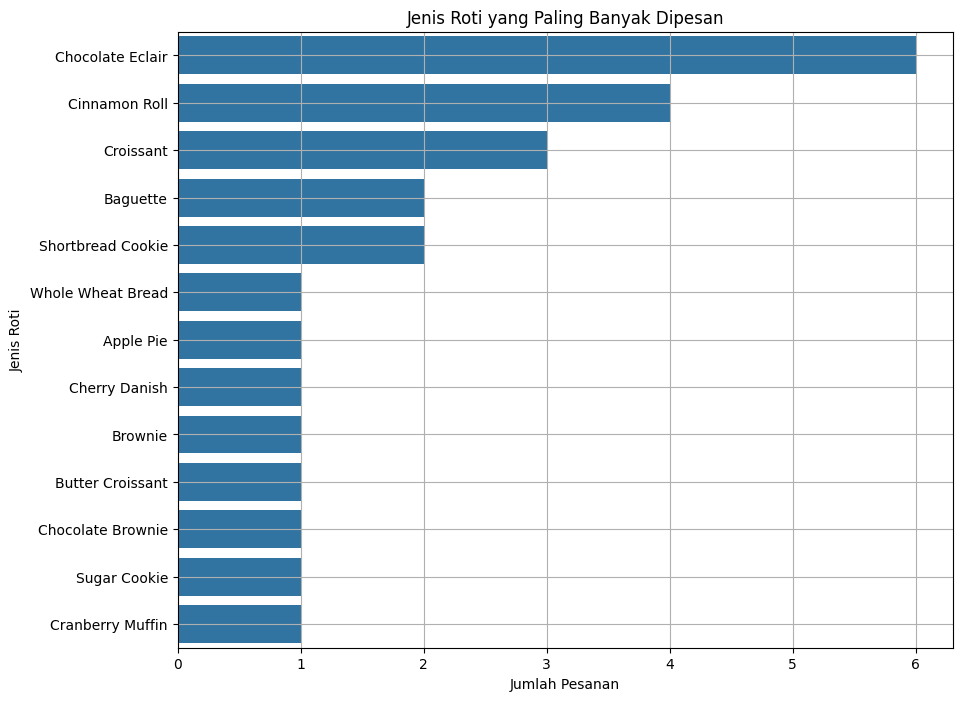

In [146]:
# Visualisasi jenis roti yang paling banyak dipesan
plt.figure(figsize=(10, 8))
sns.countplot(y='item_name', data=df_roti, order=df_roti['item_name'].value_counts().index)
plt.title('Jenis Roti yang Paling Banyak Dipesan')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Jenis Roti')
plt.grid(True)
plt.show()

## c : Rata-rata kepuasan pelanggan (customer_rating) per hari.

In [147]:
# Menghitung rata-rata kepuasan pelanggan per hari
rata_rata_kepuasan = df_roti.groupby(df_roti['transaction_date'].dt.date)['customer_rating'].mean().reset_index()

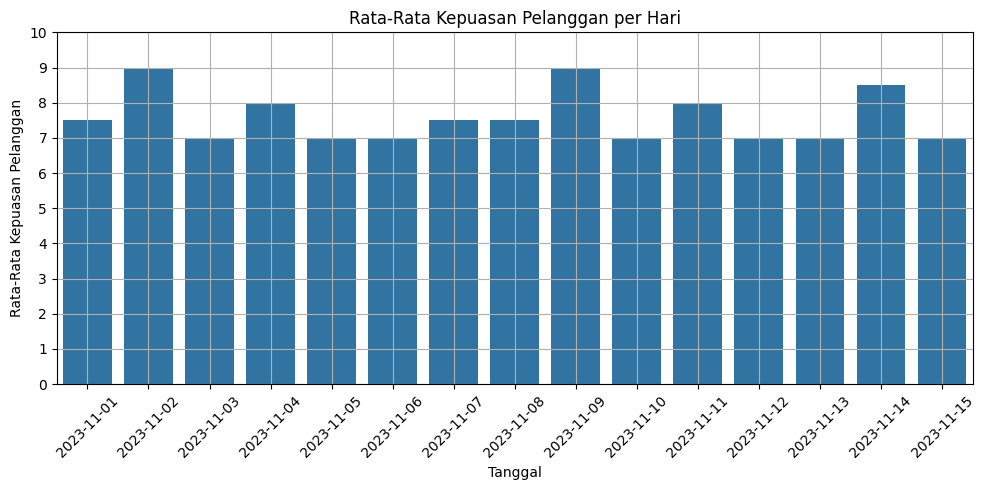

In [158]:
# Visualisasi rata-rata kepuasan pelanggan per hari
plt.figure(figsize=(10, 5))
sns.barplot(x='transaction_date', y='customer_rating', data=rata_rata_kepuasan)
plt.title('Rata-Rata Kepuasan Pelanggan per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Rata-Rata Kepuasan Pelanggan')
plt.yticks(range(0, 11))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()